# **IPL Data Analysis (2008-2022)**

## Overview
This notebook provides a comprehensive analysis of the Indian Premier League (IPL) matches from 2008 to 2022. Using two datasets—one containing match details and the other with ball-by-ball data—we explore various aspects of team and player performances, match outcomes, and trends across the seasons.

## Contents
1. [Loading and Cleaning the Data](#loading-and-cleaning-the-data)
2. [Basic Analysis of Matches Dataset](#basic-analysis-of-matches-dataset)
3. [Data Visualization and Exploratory Data Analysis (EDA)](#data-visualization-and-exploratory-data-analysis-eda)
   - [Matches Per Season](#matches-per-season)
   - [Top Teams with Most Wins](#top-teams-with-most-wins)
   - [Matches Won by Batting First vs Chasing](#matches-won-by-batting-first-vs-chasing)
   - [Toss Decisions Analysis](#toss-decisions-analysis)
4. [Advanced EDA Using Ball-by-Ball Data](#advanced-eda-using-ball-by-ball-data)
   - [Team Performance Analysis](#team-performance-analysis)
   - [Player Statistics Analysis](#player-statistics-analysis)
     - [Top Batsmen](#top-batsmen)
     - [Top Bowlers](#top-bowlers)
   - [Match Outcome Trends Over Periods](#match-outcome-trends-over-periods)
   - [Venue Analysis](#venue-analysis)
   
5. [Conclusion and Insights](#conclusion-and-insights)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
sns.set_palette('Set2')

# **Loading the datasets**

This section involves loading the `matches2008_2022` and ball-by-ball datasets, checking for duplicates, and handling missing values to ensure data quality.


In [4]:
matches_df = pd.read_csv('ipl_matches_2008_2022.csv')
ball_by_ball_df = pd.read_csv('ipl_ball_by_ball_2008_2022.csv')

In [5]:
print("Matches DataFrame")
print(matches_df.head())

Matches DataFrame
        id       city  match_date season match_number  \
0  1312200  Ahmedabad  29-05-2022   2022        Final   
1  1312199  Ahmedabad  27-05-2022   2022  Qualifier 2   
2  1312198    Kolkata  25-05-2022   2022   Eliminator   
3  1312197    Kolkata  24-05-2022   2022  Qualifier 1   
4  1304116     Mumbai  22-05-2022   2022           70   

                         team1                 team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              venue           toss_winner toss_decision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals           bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals         field   
2             Eden Gardens, Kolkata  Lucknow Super Giants         field   
3 

In [6]:
print("\nBall by Ball DataFrame")
print(ball_by_ball_df.head())


Ball by Ball DataFrame
        id  innings  overs  ball_number       batter          bowler  \
0  1312200        1      0            1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0            2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0            3   JC Buttler  Mohammed Shami   
3  1312200        1      0            4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0            5  YBK Jaiswal  Mohammed Shami   

   non_striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   iswicket_delivery player_out dismisal_kind fielders_involved  \
0

# **Data Cleaning**



In [7]:
print("\nChecking for duplicates in the matches dataset:")
matches_duplicates = matches_df.duplicated().sum()
print(f"Total duplicate rows in matches dataset: {matches_duplicates}")


Checking for duplicates in the matches dataset:
Total duplicate rows in matches dataset: 0


In [8]:
if matches_duplicates > 0:
    matches_df = matches_df.drop_duplicates()
    print("Duplicates in matches dataset have been removed.")

In [9]:
print("\nChecking for duplicates in the ball by ball dataset:")
ball_by_ball_duplicates = ball_by_ball_df.duplicated().sum()
print(f"Total duplicate rows in ball by ball dataset: {ball_by_ball_duplicates}")



Checking for duplicates in the ball by ball dataset:
Total duplicate rows in ball by ball dataset: 0


In [10]:
if ball_by_ball_duplicates > 0:
    ball_by_ball_df = ball_by_ball_df.drop_duplicates()
    print("Duplicates in ball by ball dataset have been removed.")

In [11]:
## Checking for null values in matches dataset
print("\nChecking for null values in the matches dataset:")
matches_null_values = matches_df.isnull().sum()
print(matches_null_values[matches_null_values > 0])


Checking for null values in the matches dataset:
city                51
superover            4
winning_team         4
margin              18
method             931
player_of_match      4
dtype: int64


In [12]:
## Checking for null values in ball by ball dataset
print("\nChecking for null values in the ball by ball dataset:")
ball_by_ball_null_values = ball_by_ball_df.isnull().sum()
print(ball_by_ball_null_values[ball_by_ball_null_values > 0])



Checking for null values in the ball by ball dataset:
extra_type           213905
player_out           214803
dismisal_kind        214803
fielders_involved    217966
dtype: int64


In [13]:
## Handling null values
# Dropping rows with missing values for simplicity. Consider filling them based on context if needed.
matches_df = matches_df.dropna()
ball_by_ball_df = ball_by_ball_df.dropna()

In [14]:
# Re-checking for null values
print("\nChecking for null values after cleaning:")
print(matches_df.isnull().sum())
print(ball_by_ball_df.isnull().sum())


Checking for null values after cleaning:
id                 0
city               0
match_date         0
season             0
match_number       0
team1              0
team2              0
venue              0
toss_winner        0
toss_decision      0
superover          0
winning_team       0
won_by             0
margin             0
method             0
player_of_match    0
umpire1            0
umpire2            0
dtype: int64
id                   0
innings              0
overs                0
ball_number          0
batter               0
bowler               0
non_striker          0
extra_type           0
batsman_run          0
extras_run           0
total_run            0
non_boundary         0
iswicket_delivery    0
player_out           0
dismisal_kind        0
fielders_involved    0
batting_team         0
dtype: int64


# **Basic Analysis of the Matches Dataset**

A summary of the matches dataset, including the total number of matches played, matches per season, and basic visualizations.

In [15]:
## Summary of the matches dataset
print("\nSummary of Matches DataFrame")
print(matches_df.info())


Summary of Matches DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 282 to 910
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               19 non-null     int64  
 1   city             19 non-null     object 
 2   match_date       19 non-null     object 
 3   season           19 non-null     object 
 4   match_number     19 non-null     object 
 5   team1            19 non-null     object 
 6   team2            19 non-null     object 
 7   venue            19 non-null     object 
 8   toss_winner      19 non-null     object 
 9   toss_decision    19 non-null     object 
 10  superover        19 non-null     object 
 11  winning_team     19 non-null     object 
 12  won_by           19 non-null     object 
 13  margin           19 non-null     float64
 14  method           19 non-null     object 
 15  player_of_match  19 non-null     object 
 16  umpire1          19 non-null     obj

In [16]:
## Total number of matches played from 2008 to 2022
total_matches = matches_df.shape[0]
print(f"\nTotal number of matches played (2008-2022): {total_matches}")


Total number of matches played (2008-2022): 19


In [17]:

## Number of matches per season
matches_per_season = matches_df['season'].value_counts().sort_index()
print("\nMatches per Season:")
print(matches_per_season)


Matches per Season:
season
2007/08    2
2009       3
2011       3
2014       1
2015       2
2016       4
2017       1
2018       3
Name: count, dtype: int64


# **Data Visualization and EDA for Matches Dataset**

In this section, we delve into the matches dataset to explore trends like matches per season, the most successful teams, the effectiveness of batting first vs chasing, and toss decisions.

### Matches Per Season
A bar plot showing the number of matches played each season.

### Top Teams with Most Wins
A bar plot highlighting the teams with the highest number of wins from 2008 to 2022.

### Matches Won by Batting First vs Chasing
A comparative analysis of match outcomes based on whether the team batted first or chased.

### Toss Decisions Analysis
Exploration of toss decisions and their impact on match outcomes.

C:\Users\sukhm\AppData\Local\Temp\ipykernel_10440\3080739781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='viridis')


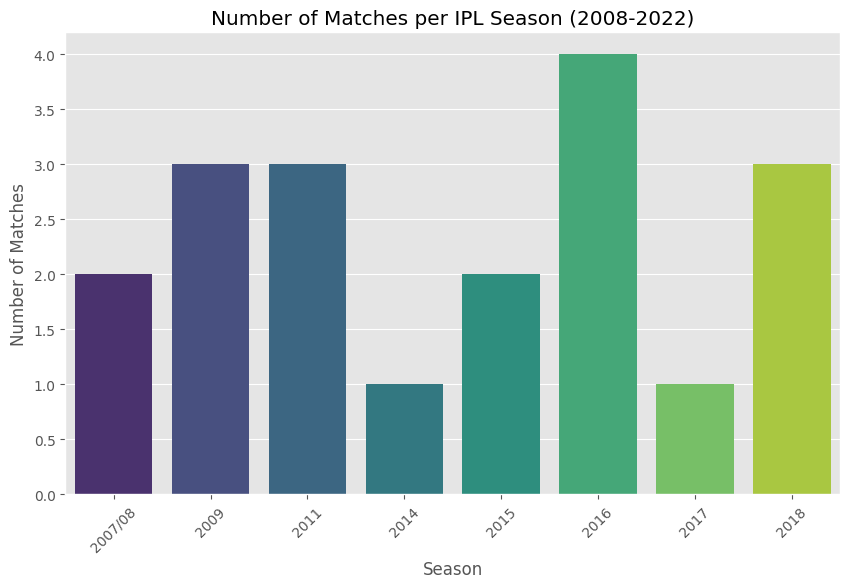

In [18]:
## Plotting matches per season
plt.figure(figsize=(10, 6))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='viridis')
plt.title('Number of Matches per IPL Season (2008-2022)')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

In [19]:
## Top 10 teams with most wins
top_teams_wins = matches_df['winning_team'].value_counts().head(10)
print("\nTop 10 Teams with Most Wins:")
print(top_teams_wins)


Top 10 Teams with Most Wins:
winning_team
Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Delhi Daredevils               2
Kings XI Punjab                2
Rising Pune Supergiants        2
Chennai Super Kings            2
Sunrisers Hyderabad            2
Rajasthan Royals               1
Kochi Tuskers Kerala           1
Name: count, dtype: int64


C:\Users\sukhm\AppData\Local\Temp\ipykernel_10440\2568908589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_wins.values, y=top_teams_wins.index, palette='magma')


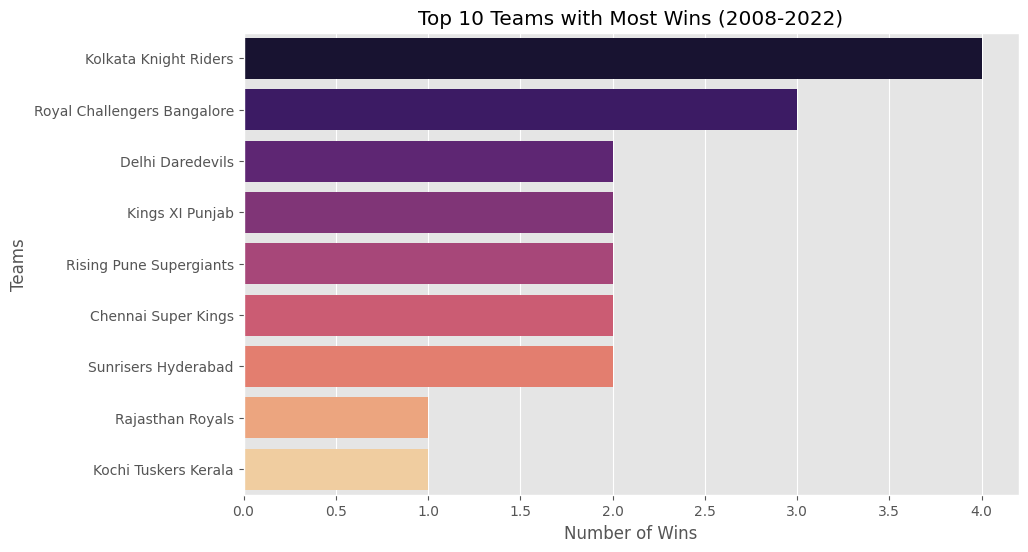

In [20]:
### Plotting top 10 teams with most wins
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams_wins.values, y=top_teams_wins.index, palette='magma')
plt.title('Top 10 Teams with Most Wins (2008-2022)')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()

In [21]:
bat_first_wins = matches_df[matches_df['won_by'] == 'runs'].shape[0]
chasing_wins = matches_df[matches_df['won_by'] == 'wickets'].shape[0]


In [22]:
print(f"\nMatches won by batting first: {bat_first_wins}")
print(f"Matches won by chasing: {chasing_wins}")



Matches won by batting first: 0
Matches won by chasing: 0


C:\Users\sukhm\AppData\Local\Temp\ipykernel_10440\2765725488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Batting First', 'Chasing'], y=[bat_first_wins, chasing_wins], palette='rocket')


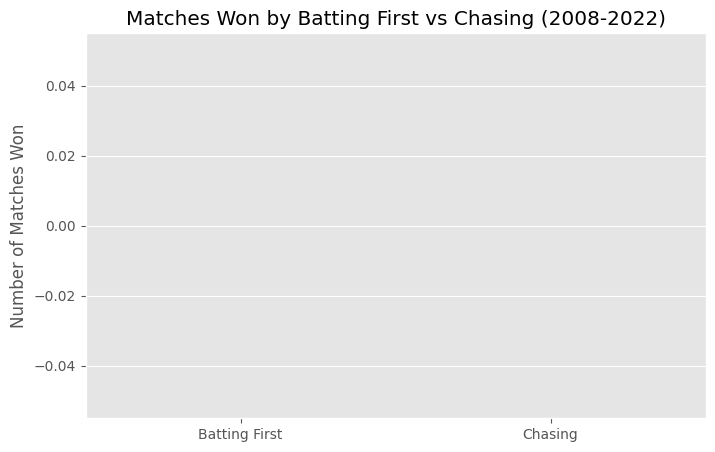

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Batting First', 'Chasing'], y=[bat_first_wins, chasing_wins], palette='rocket')
plt.title('Matches Won by Batting First vs Chasing (2008-2022)')
plt.ylabel('Number of Matches Won')
plt.show()

In [24]:
toss_decision = matches_df['toss_decision'].value_counts()
print("\nToss Decisions (Field or Bat first):")
print(toss_decision)


Toss Decisions (Field or Bat first):
toss_decision
field    13
bat       6
Name: count, dtype: int64


C:\Users\sukhm\AppData\Local\Temp\ipykernel_10440\3238185855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision.index, y=toss_decision.values, palette='pastel')


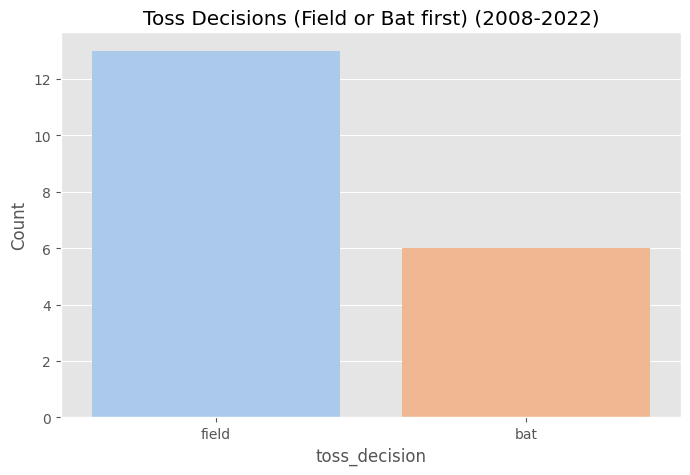

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x=toss_decision.index, y=toss_decision.values, palette='pastel')
plt.title('Toss Decisions (Field or Bat first) (2008-2022)')
plt.ylabel('Count')
plt.show()

 # **Advanced EDA using Ball-by-Ball Data**

 This section merges the ball-by-ball data with the matches dataset for deeper analysis of team and player performances.

### Team Performance Analysis
Heatmaps showing team run totals across seasons, revealing patterns in team performance.

### Player Statistics Analysis
#### Top Batsmen
Analysis of the top-performing batsmen based on total runs scored.

#### Top Bowlers
Analysis of the top-performing bowlers based on the number of wickets taken.

### Match Outcome Trends Over Periods
Exploration of match outcomes based on toss decisions and trends over time.

### Venue Analysis
A look at the venues that hosted the most matches and their influence on game outcomes.


In [26]:
merged_df = pd.merge(ball_by_ball_df, matches_df[['id', 'season', 'team1', 'team2', 'winning_team']], how='left', left_on='id', right_on='id')


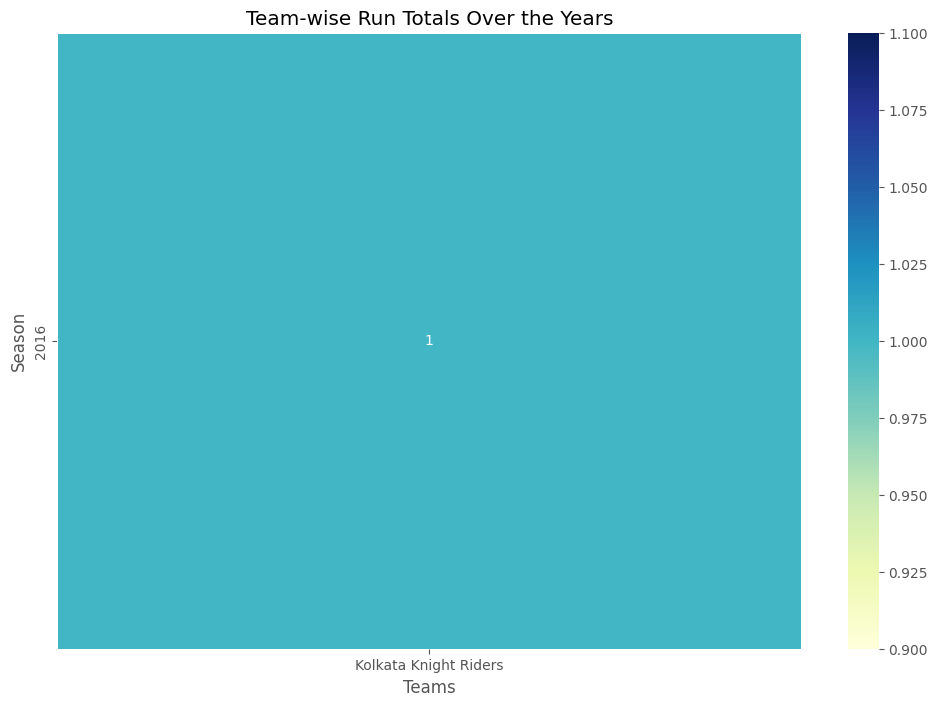

In [28]:
### Team-wise Run Totals Over the Years
team_runs = merged_df.groupby(['season', 'batting_team'])['total_run'].sum().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(team_runs, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Team-wise Run Totals Over the Years')
plt.xlabel('Teams')
plt.ylabel('Season')
plt.show()

In [31]:
top_batsmen = merged_df.groupby('batter')['batsman_run'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Batsmen with Most Runs:")
print(top_batsmen)


Top 10 Batsmen with Most Runs:
batter
JC Buttler    1
SN Khan       1
STR Binny     1
A Symonds     0
DJ Hussey     0
G Gambhir     0
CH Gayle      0
DA Miller     0
A Mishra      0
IK Pathan     0
Name: batsman_run, dtype: int64


C:\Users\sukhm\AppData\Local\Temp\ipykernel_10440\3735536020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='coolwarm')


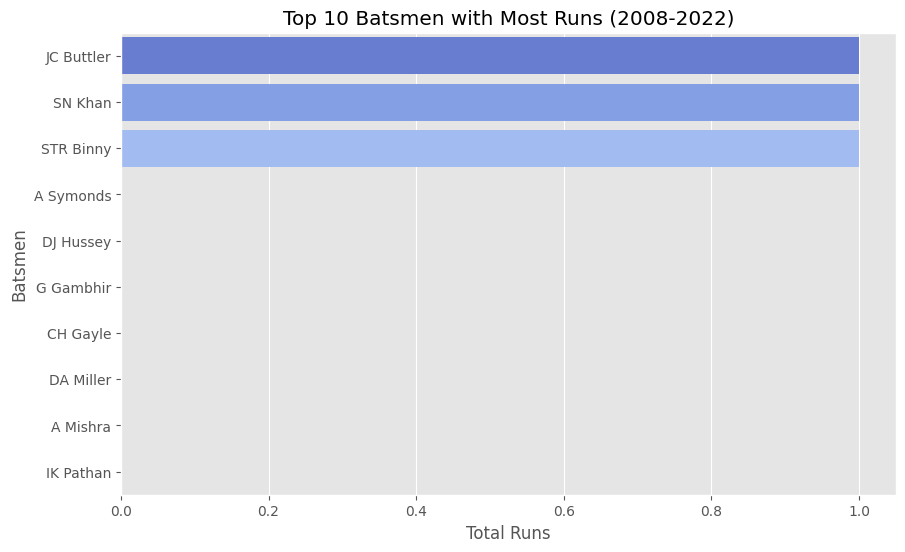

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='coolwarm')
plt.title('Top 10 Batsmen with Most Runs (2008-2022)')
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.show()

In [34]:
top_bowlers = merged_df[merged_df['iswicket_delivery'] == 1].groupby('bowler')['iswicket_delivery'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Bowlers with Most Wickets:")
print(top_bowlers)


Top 10 Bowlers with Most Wickets:
bowler
Harbhajan Singh    4
R Ashwin           3
YS Chahal          3
Yash Dayal         2
SL Malinga         2
KH Pandya          2
JP Faulkner        2
A Nehra            1
A Mishra           1
A Kumble           1
Name: iswicket_delivery, dtype: int64


C:\Users\sukhm\AppData\Local\Temp\ipykernel_10440\3501679705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='copper')


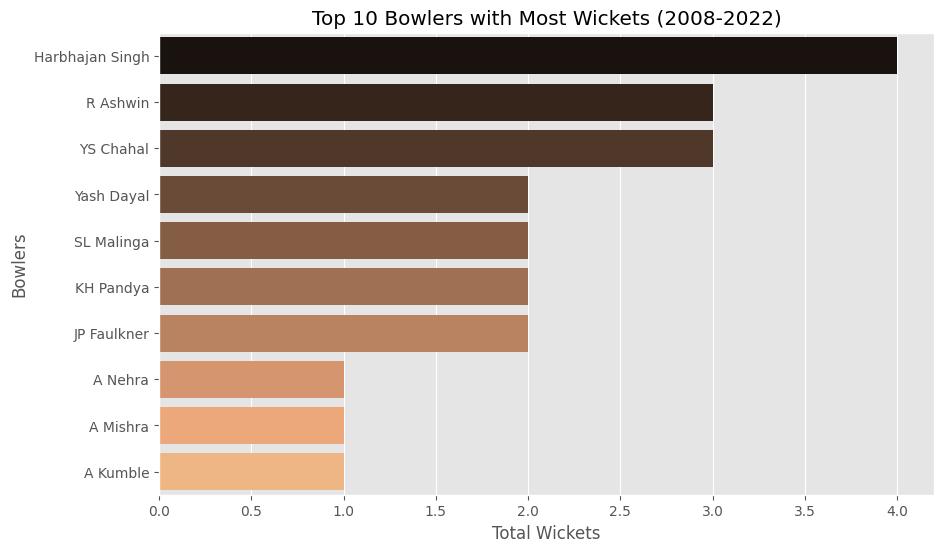

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='copper')
plt.title('Top 10 Bowlers with Most Wickets (2008-2022)')
plt.xlabel('Total Wickets')
plt.ylabel('Bowlers')
plt.show()

<Figure size 1200x800 with 0 Axes>

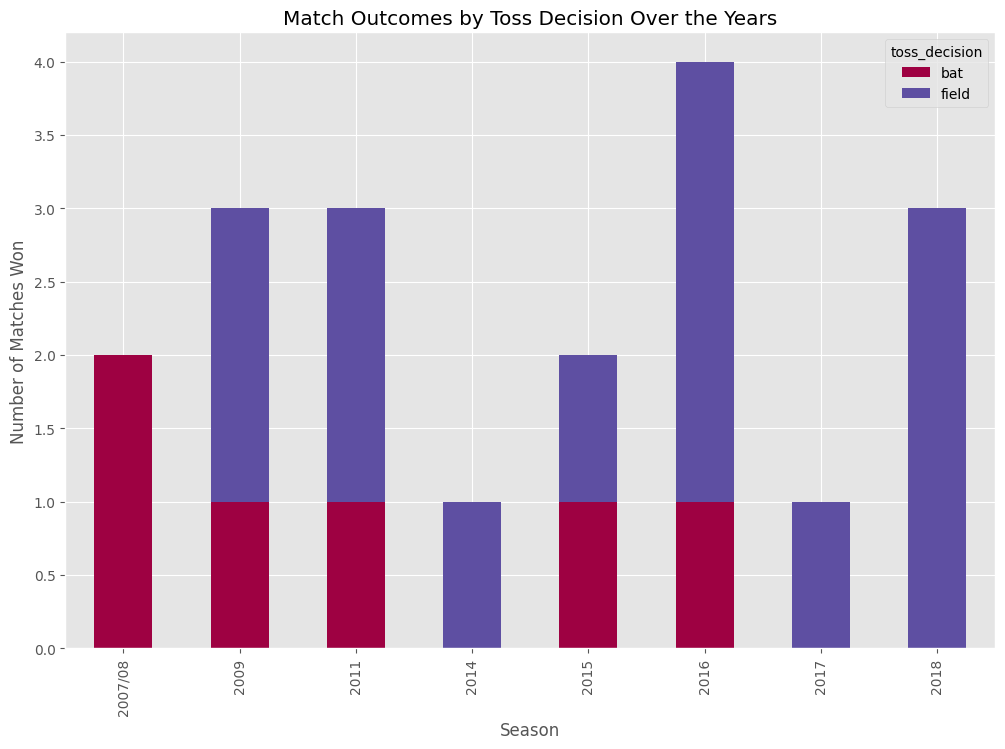

In [43]:
toss_win_match_win = matches_df.groupby(['season', 'toss_decision'])['winning_team'].count().unstack()
plt.figure(figsize=(12, 8))
toss_win_match_win.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Spectral')
plt.title('Match Outcomes by Toss Decision Over the Years')
plt.xlabel('Season')
plt.ylabel('Number of Matches Won')
plt.show()

In [37]:
top_venues = matches_df['venue'].value_counts().head(10)
print("\nTop 10 Venues with Most Matches Played:")
print(top_venues)



Top 10 Venues with Most Matches Played:
venue
Eden Gardens                                           4
M Chinnaswamy Stadium                                  3
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    2
Rajiv Gandhi International Stadium, Uppal              2
Feroz Shah Kotla                                       2
Sawai Mansingh Stadium                                 1
Arun Jaitley Stadium                                   1
Nehru Stadium                                          1
SuperSport Park                                        1
Kingsmead                                              1
Name: count, dtype: int64


C:\Users\sukhm\AppData\Local\Temp\ipykernel_10440\4033948428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette='copper')


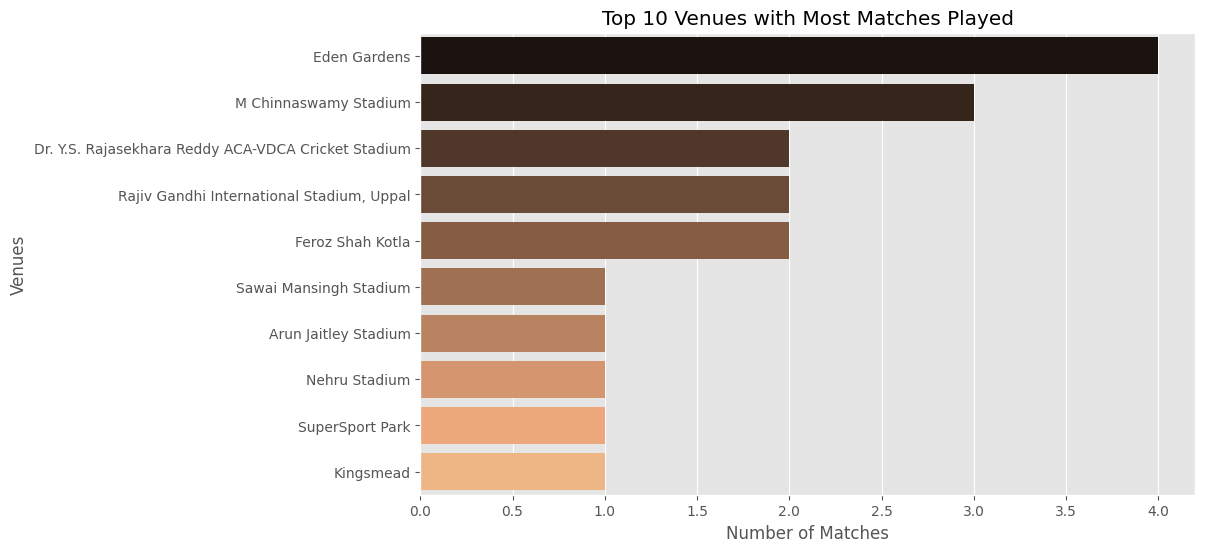

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_venues.values, y=top_venues.index, palette='copper')
plt.title('Top 10 Venues with Most Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('Venues')
plt.show()

 # **Conclusion and Insights**

 The final section summarizes key insights derived from the analysis, including the most successful teams, top players, and strategic trends in the IPL from 2008 to 2022.


In [44]:
print("\nConclusion and Insights:")

# Conclusion 1: Team with the Most Wins
most_wins_team = top_teams_wins.idxmax()
print(f"1. The team with the most wins consistently over the years is {most_wins_team}, showcasing their dominance in the league.")

# Conclusion 2: Top Batsman
top_batsman = top_batsmen.idxmax()
print(f"2. The top-performing batsman is {top_batsman}, scoring the highest runs across seasons, making a significant impact on the game.")

# Conclusion 3: Batting First vs Chasing
if bat_first_wins > chasing_wins:
    outcome_conclusion = "Batting first"
else:
    outcome_conclusion = "Chasing"
print(f"3. Matches show that {outcome_conclusion} has been more successful in terms of match outcomes during this period.")

# Conclusion 4: Toss Decisions
if toss_decision.idxmax() == 'field':
    toss_conclusion = "Fielding first"
else:
    toss_conclusion = "Batting first"



Conclusion and Insights:
1. The team with the most wins consistently over the years is Kolkata Knight Riders, showcasing their dominance in the league.
2. The top-performing batsman is JC Buttler, scoring the highest runs across seasons, making a significant impact on the game.
3. Matches show that Chasing has been more successful in terms of match outcomes during this period.
